## Analysis of HyFlux StormSurge Med results

This analysis is part of an effort to figure out a discepancy with hyflux data and a time phase of 6 hours in the Med Sea storm surge calculation. 

In [50]:
%matplotlib notebook

In [51]:
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import numpy as np
from pmap import getmap
import pandas
import matplotlib.pyplot as plt
import datetime

In [52]:
today=datetime.datetime.today()


In [53]:
PATH='/mnt/ECMWF/processed/{}/FIX_MED_SEA/'.format(today.year)

In [54]:
tstamp='20160616.00'

In [55]:
hfiles=glob.glob(PATH+'calc_{}/TIF_H*.tif'.format(tstamp))

test the parsing

In [56]:
print hfiles[0].split('/')[-1].split('_H_')[1].split('.')[0]

08532000


In [57]:
t=[]
for k in hfiles:
    t.append(k.split('/')[-1].split('_H_')[1].split('.')[0])

In [58]:
time=np.array(t)
print time

['08532000' '08535600' '08539200' '08542800' '08546400' '08550000'
 '08553600' '08557200' '08560800' '08564400' '08568000' '08571600'
 '08575200' '08578800' '08582400' '08586000' '08589600' '08593200'
 '08596800' '08600400' '08604000' '08607600' '08611200' '08614800'
 '08618400' '08622000' '08625600' '08629200' '08632800' '08636400'
 '08640000' '08643600' '08647200' '08650800' '08654400' '08658000'
 '08661600' '08665200' '08668800' '08672400' '08676000' '08679600'
 '08683200' '08686800' '08690400' '08694000' '08697600' '08701200'
 '08704800' '08708400' '08712000' '08715600' '08719200' '08722800'
 '08726400' '08730000' '08733600' '08737200' '08740800' '08744400'
 '08748000' '08751600' '08755200' '08758800' '08762400' '08766000'
 '08769600' '08773200' '08776800' '08780400' '08784000' '08787600'
 '08791200' '08794800' '08798400' '08802000' '08805600' '08809200'
 '08812800']


first we parse the bathymetry tif to get the i,j of the point in question 

In [59]:
filename=PATH+'calc_{}/bathymetry.tif'.format(tstamp)
grid = getmap(filename)

gt=grid.GeoTr

width=grid.NCOLS
height=grid.NROWS

minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5]
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

lon=np.linspace(minx,maxx,width,endpoint=True)
lat=np.linspace(miny,maxy,height,endpoint=True)


Now define the lat/lon we want. First we load the file with the observation points we selected.

In [60]:
OFILE='/mnt/pandora/Projects_Critech/EX_2015_CoastAlRisk/maps/data/s_b_data.txt'

In [61]:
obs=pandas.read_csv(OFILE,delimiter='\t')

In [62]:
obs

,ID,NAME,latobs,lonobs,latcalc,loncalc
0,1630,Almeira,36.8300,-2.4800,36.72506,-2.468386
1,1706,Valencia,39.4400,-0.3100,39.44040,-0.299000
2,819,Barcelona,41.3400,2.1600,41.27749,2.213909
3,1461,Palma de Mallorca,39.5600,2.6380,39.39457,2.614552
4,1741,Sete,43.3976,3.6991,43.31857,3.761195
5,1500,Corsica,42.9670,9.3500,43.09528,9.267036
6,1841,Carloforte,39.1480,8.3095,39.22599,8.231240
7,1848,Imperia,43.8783,8.0189,43.83057,8.149480
8,1846,Genova,44.4101,8.9255,44.32259,8.919400
9,1843,Civitavecchia,42.0940,11.7896,41.99920,11.677270


Let's choose a point e.g. 1858 

In [64]:
point=12

In [65]:
plat,plon=obs['latcalc'][point],obs['loncalc'][point]

In [66]:
print plat,plon # check

38.16961 13.45963


Now find the i,j for this point

In [67]:
i=np.abs(lat-plat).argmin()
j=np.abs(lon-plon).argmin()
print i,j, lat[i-1:i+2],lon[j-1:j+2]


145 284 [ 38.13380233  38.20070374  38.26760515] [ 13.40564635  13.47245076  13.53925516]


### NOTE: How did we compute these calc points?

Now we parse the geotif files ad select the i,j value adding it to a new list

In [68]:
hobs=[]

In [69]:
dat=getmap(hfiles[0])
dat.data.shape

(285, 727)

Note that we need to flip upside down the data to get the correct i,j (inherit to the geotif coordination system ?)

In [70]:
for ifile in hfiles:
    dat=getmap(ifile)
    hobs.append(np.flipud(dat.data)[i,j])

In [71]:
hobs=np.array(hobs)

In [72]:
hobs

array([-0.01480134, -0.00837771, -0.00016774,  0.00912686,  0.0193402 ,
        0.02595216,  0.03131369,  0.03142372,  0.03349916,  0.04631253,
        0.05689279,  0.06294978,  0.0647742 ,  0.06913181,  0.07150362,
        0.07449113,  0.07489996,  0.07270238,  0.07600121,  0.0733685 ,
        0.07902304,  0.08505791,  0.08415201,  0.0848164 ,  0.08761296,
        0.08597105,  0.07416075,  0.06951011,  0.06101624,  0.05862661,
        0.04601065,  0.03465465,  0.02435575,  0.01373132,  0.00324755,
       -0.00606226, -0.00738415, -0.00784191, -0.00642357, -0.00290438,
       -0.00540774, -0.00793479, -0.01212033, -0.01752048, -0.02233061,
       -0.02676555, -0.02875189, -0.02874376, -0.02816035, -0.02874579,
       -0.02954494, -0.03109363, -0.03180165, -0.03200777, -0.03127511,
       -0.0306749 , -0.03128254, -0.03417401, -0.03750928, -0.04135096,
       -0.04250735, -0.0408701 , -0.03968502, -0.0372023 , -0.03470273,
       -0.03505552, -0.03644784, -0.03950909, -0.04029757, -0.04

Optionally we can plot. Note that the time stamp on the time array are seconds passed from a certain starting point. How to determine that? One way is to parse the file Calc_input_deck.txt where the InTime and Fin Time is given.

In [73]:
with open(PATH+'calc_{}/Calc_input_deck.txt'.format(tstamp)) as f:
     lines = [line.rstrip('\n') for line in f]
     for atr in lines:
        if 'InTime' in atr: time1 = atr.split('*')[0]
        if 'FinTime' in atr: time2 = atr.split('*')[0]
        if 'DateTsunami' in atr: startime=atr.split('*')[0]
f.close()        

In [74]:
print time1,time2, startime

InTime=        2370          FinTime=       2448         DateTsunami= 09 Mar 2016 00:00   


In [75]:
intime=float(time1.split('=')[1])
fintime=float(time2.split('=')[1])
stime=startime.split('=')[1].strip()
print intime,fintime,stime

2370.0 2448.0 09 Mar 2016 00:00


the starting time of this run is ... 

In [76]:
odate=datetime.datetime.strptime(stime,'%d %b %Y %H:%S')
print odate

2016-03-09 00:00:00


So the start time of this particular computation is

In [77]:
print odate+datetime.timedelta(hours=intime)

2016-06-15 18:00:00


 while the time stamp on the file is 

In [78]:
print tstamp

20160616.00


thus the computation starts 6 hours before.!!!

### Annual Module

parsing for all folders in this year 

In [79]:
allfolders=glob.glob(PATH+'calc_*')

In [80]:
folders=allfolders[-10:]# last 10 folders

<IPython.core.display.Javascript object>


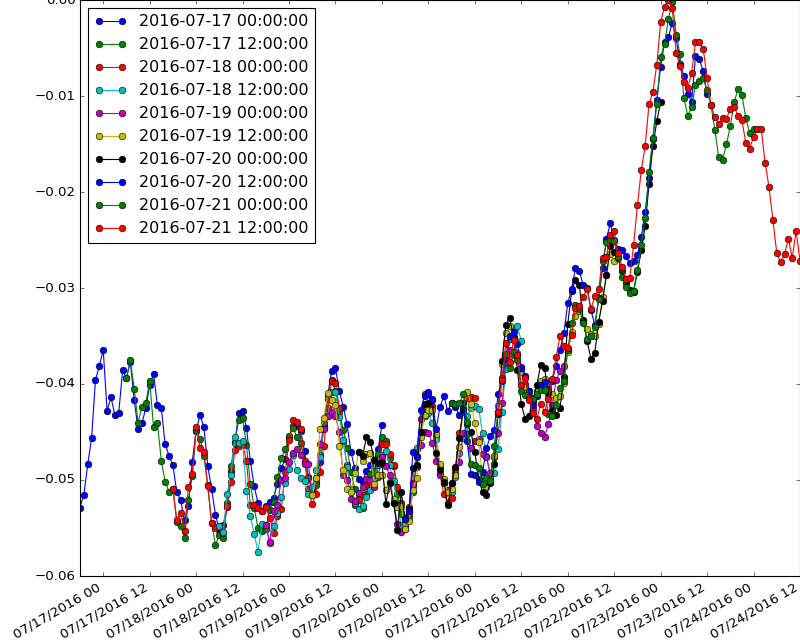

In [86]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=[0,12]))
ax.xaxis_date()

for ifolder in folders: 
    rstamp=ifolder.split('/')[-1].split('_')[1] # the time stamp on the run folder (actual date of the run)
    rdate=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    hfiles=glob.glob(ifolder+'/TIF_H*.tif')
    t=[]
    hobs=[]
    for ifile in hfiles:  
        dat=getmap(ifile)
        hobs.append(np.flipud(dat.data)[i,j])
        ti=ifile.split('/')[-1].split('_H_')[1].split('.')[0]
        if ti == 0: # there is a new restart
            t.append(rdate)
            odate=rdate # set new odate
        else:
            t.append(odate+datetime.timedelta(hours=float(ti)/60./60.))
    plt.plot(t,hobs,'o-',label=rdate)

plt.gcf().autofmt_xdate()
plt.legend(loc=0)
plt.show()

You can see that the elevation for the 6 hours before the run's main time stamp do not match. WHY? What changed? What is the one to use for a long time series? 

## Compare forcing

Check the forcing files in the time folders.

In [87]:
allfolders=glob.glob(PATH+'tif_*')

In [88]:
folders=allfolders[-10:]

In [89]:
fdic={}  # create a dictionary to store the timestamps of every run(folder)

In [90]:
for ifolder in folders: 
    rstamp=ifolder.split('/')[-1].split('_')[1] # the time stamp on the run folder (actual date of the run)
    rdate=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    pfiles=glob.glob(ifolder+'/TIF_PRESS*.tif')
    t=[]
    for ifile in pfiles:
        ti=ifile.split('/')[-1].split('_PRESS_')[1].split('.')[0]
        ta=datetime.datetime.strptime(ti,'%Y%m%d%H%M')
        t.append(ta)
    fdic[rstamp]=t

In [91]:
for m in range(1,np.size(folders)):
    rstamp=folders[m].split('/')[-1].split('_')[1] 
    foldertime=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    previous_stamp=folders[m-1].split('/')[-1].split('_')[1]
    pfiles=glob.glob(folders[m]+'/TIF_PRESS*.tif')
    for ifile in pfiles:
        ti=ifile.split('/')[-1].split('_PRESS_')[1].split('.')[0]
        ta=datetime.datetime.strptime(ti,'%Y%m%d%H%M')
        if ta < foldertime and ta in fdic[previous_stamp]:
            print 'check {}'.format(ta)
            dprev=getmap(folders[m-1]+'/TIF_PRESS_'+ti+'.tif')
            dcur=getmap(folders[m]+'/TIF_PRESS_'+ti+'.tif')
            #compare data
            if not np.array_equal(dprev.data,dcur.data) : print 'error in {}'.format(ta)
            

check 2016-07-17 06:00:00
check 2016-07-17 07:00:00
check 2016-07-17 08:00:00
check 2016-07-17 09:00:00
check 2016-07-17 10:00:00
check 2016-07-17 11:00:00
check 2016-07-17 18:00:00
check 2016-07-17 19:00:00
check 2016-07-17 20:00:00
check 2016-07-17 21:00:00
check 2016-07-17 22:00:00
check 2016-07-17 23:00:00
check 2016-07-18 06:00:00
check 2016-07-18 07:00:00
check 2016-07-18 08:00:00
check 2016-07-18 09:00:00
check 2016-07-18 10:00:00
check 2016-07-18 11:00:00
check 2016-07-18 18:00:00
check 2016-07-18 19:00:00
check 2016-07-18 20:00:00
check 2016-07-18 21:00:00
check 2016-07-18 22:00:00
check 2016-07-18 23:00:00
check 2016-07-19 06:00:00
check 2016-07-19 07:00:00
check 2016-07-19 08:00:00
check 2016-07-19 09:00:00
check 2016-07-19 10:00:00
check 2016-07-19 11:00:00
check 2016-07-19 18:00:00
check 2016-07-19 19:00:00
check 2016-07-19 20:00:00
check 2016-07-19 21:00:00
check 2016-07-19 22:00:00
check 2016-07-19 23:00:00
check 2016-07-20 06:00:00
check 2016-07-20 07:00:00
check 2016-0

the same thing for U,V, VMAX

In [92]:
for m in range(1,np.size(folders)):
    rstamp=folders[m].split('/')[-1].split('_')[1] 
    foldertime=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    previous_stamp=folders[m-1].split('/')[-1].split('_')[1]
    pfiles=glob.glob(folders[m]+'/TIF_U10*.tif')
    for ifile in pfiles:
        ti=ifile.split('/')[-1].split('_U10_')[1].split('.')[0]
        ta=datetime.datetime.strptime(ti,'%Y%m%d%H%M')
        if ta < foldertime and ta in fdic[previous_stamp]:
            print 'check {}'.format(ta)
            dprev=getmap(folders[m-1]+'/TIF_U10_'+ti+'.tif')
            dcur=getmap(folders[m]+'/TIF_U10_'+ti+'.tif')
            #compare data
            if not np.array_equal(dprev.data,dcur.data) : print 'error in {}'.format(ta)
            

check 2016-07-17 06:00:00
check 2016-07-17 07:00:00
check 2016-07-17 08:00:00
check 2016-07-17 09:00:00
check 2016-07-17 10:00:00
check 2016-07-17 11:00:00
check 2016-07-17 18:00:00
check 2016-07-17 19:00:00
check 2016-07-17 20:00:00
check 2016-07-17 21:00:00
check 2016-07-17 22:00:00
check 2016-07-17 23:00:00
check 2016-07-18 06:00:00
check 2016-07-18 07:00:00
check 2016-07-18 08:00:00
check 2016-07-18 09:00:00
check 2016-07-18 10:00:00
check 2016-07-18 11:00:00
check 2016-07-18 18:00:00
check 2016-07-18 19:00:00
check 2016-07-18 20:00:00
check 2016-07-18 21:00:00
check 2016-07-18 22:00:00
check 2016-07-18 23:00:00
check 2016-07-19 06:00:00
check 2016-07-19 07:00:00
check 2016-07-19 08:00:00
check 2016-07-19 09:00:00
check 2016-07-19 10:00:00
check 2016-07-19 11:00:00
check 2016-07-19 18:00:00
check 2016-07-19 19:00:00
check 2016-07-19 20:00:00
check 2016-07-19 21:00:00
check 2016-07-19 22:00:00
check 2016-07-19 23:00:00
check 2016-07-20 06:00:00
check 2016-07-20 07:00:00
check 2016-0

In [93]:
for m in range(1,np.size(folders)):
    rstamp=folders[m].split('/')[-1].split('_')[1] 
    foldertime=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    previous_stamp=folders[m-1].split('/')[-1].split('_')[1]
    pfiles=glob.glob(folders[m]+'/TIF_V10*.tif')
    for ifile in pfiles:
        ti=ifile.split('/')[-1].split('_V10_')[1].split('.')[0]
        ta=datetime.datetime.strptime(ti,'%Y%m%d%H%M')
        if ta < foldertime and ta in fdic[previous_stamp]:
            print 'check {}'.format(ta)
            dprev=getmap(folders[m-1]+'/TIF_V10_'+ti+'.tif')
            dcur=getmap(folders[m]+'/TIF_V10_'+ti+'.tif')
            #compare data
            if not np.array_equal(dprev.data,dcur.data) : print 'error in {}'.format(ta)
            

check 2016-07-17 06:00:00
check 2016-07-17 07:00:00
check 2016-07-17 08:00:00
check 2016-07-17 09:00:00
check 2016-07-17 10:00:00
check 2016-07-17 11:00:00
check 2016-07-17 18:00:00
check 2016-07-17 19:00:00
check 2016-07-17 20:00:00
check 2016-07-17 21:00:00
check 2016-07-17 22:00:00
check 2016-07-17 23:00:00
check 2016-07-18 06:00:00
check 2016-07-18 07:00:00
check 2016-07-18 08:00:00
check 2016-07-18 09:00:00
check 2016-07-18 10:00:00
check 2016-07-18 11:00:00
check 2016-07-18 18:00:00
check 2016-07-18 19:00:00
check 2016-07-18 20:00:00
check 2016-07-18 21:00:00
check 2016-07-18 22:00:00
check 2016-07-18 23:00:00
check 2016-07-19 06:00:00
check 2016-07-19 07:00:00
check 2016-07-19 08:00:00
check 2016-07-19 09:00:00
check 2016-07-19 10:00:00
check 2016-07-19 11:00:00
check 2016-07-19 18:00:00
check 2016-07-19 19:00:00
check 2016-07-19 20:00:00
check 2016-07-19 21:00:00
check 2016-07-19 22:00:00
check 2016-07-19 23:00:00
check 2016-07-20 06:00:00
check 2016-07-20 07:00:00
check 2016-0

In [94]:
for m in range(1,np.size(folders)):
    rstamp=folders[m].split('/')[-1].split('_')[1] 
    foldertime=datetime.datetime.strptime(rstamp,'%Y%m%d.%H')
    previous_stamp=folders[m-1].split('/')[-1].split('_')[1]
    pfiles=glob.glob(folders[m]+'/VMAX_*.tif')
    for ifile in pfiles:
        ti=ifile.split('/')[-1].split('VMAX_')[1].split('.')[0]
        ta=datetime.datetime.strptime(ti,'%Y%m%d%H%M')
        if ta < foldertime and ta in fdic[previous_stamp]:
            print 'check {}'.format(ta)
            dprev=getmap(folders[m-1]+'/VMAX_'+ti+'.tif')
            dcur=getmap(folders[m]+'/VMAX_'+ti+'.tif')
            #compare data
            if not np.array_equal(dprev.data,dcur.data) : print 'error in {}'.format(ta)
            

check 2016-07-17 06:00:00
check 2016-07-17 07:00:00
check 2016-07-17 08:00:00
check 2016-07-17 09:00:00
check 2016-07-17 10:00:00
check 2016-07-17 11:00:00
check 2016-07-17 18:00:00
check 2016-07-17 19:00:00
check 2016-07-17 20:00:00
check 2016-07-17 21:00:00
check 2016-07-17 22:00:00
check 2016-07-17 23:00:00
check 2016-07-18 06:00:00
check 2016-07-18 07:00:00
check 2016-07-18 08:00:00
check 2016-07-18 09:00:00
check 2016-07-18 10:00:00
check 2016-07-18 11:00:00
check 2016-07-18 18:00:00
check 2016-07-18 19:00:00
check 2016-07-18 20:00:00
check 2016-07-18 21:00:00
check 2016-07-18 22:00:00
check 2016-07-18 23:00:00
check 2016-07-19 06:00:00
check 2016-07-19 07:00:00
check 2016-07-19 08:00:00
check 2016-07-19 09:00:00
check 2016-07-19 10:00:00
check 2016-07-19 11:00:00
check 2016-07-19 18:00:00
check 2016-07-19 19:00:00
check 2016-07-19 20:00:00
check 2016-07-19 21:00:00
check 2016-07-19 22:00:00
check 2016-07-19 23:00:00
check 2016-07-20 06:00:00
check 2016-07-20 07:00:00
check 2016-0

Visualization

In [95]:
dprev.data

array([[  9.4022789 ,   8.7896719 ,   8.24467659, ...,   4.13413763,
          3.93161011,   3.80840564],
       [  9.93895912,   9.46519852,   9.03727341, ...,   4.01389742,
          3.98226666,   3.75299621],
       [ 10.01610947,   9.43228912,   8.84845352, ...,   4.1047411 ,
          4.10893774,   4.11706066],
       ..., 
       [  6.23682117,   6.02438068,   5.76753807, ...,   3.41415334,
          3.54551315,   3.80748653],
       [  6.1069622 ,   5.98013353,   5.80460644, ...,   3.09973717,
          3.30417895,   3.53014183],
       [  5.91692066,   5.87674856,   5.77778769, ...,   2.88474011,
          3.13981104,   3.41407657]])

In [96]:
dcur.data

array([[  9.4022789 ,   8.7896719 ,   8.24467659, ...,   4.13413763,
          3.93161011,   3.80840564],
       [  9.93895912,   9.46519852,   9.03727341, ...,   4.01389742,
          3.98226666,   3.75299621],
       [ 10.01610947,   9.43228912,   8.84845352, ...,   4.1047411 ,
          4.10893774,   4.11706066],
       ..., 
       [  6.23682117,   6.02438068,   5.76753807, ...,   3.41415334,
          3.54551315,   3.80748653],
       [  6.1069622 ,   5.98013353,   5.80460644, ...,   3.09973717,
          3.30417895,   3.53014183],
       [  5.91692066,   5.87674856,   5.77778769, ...,   2.88474011,
          3.13981104,   3.41407657]])

## So input files are the same !!

Here we compare the values on the NETCDF files with the one above from the geotif files. For the retrieval of data from the netcdf see ...